## Integrantes
<ul>
<li>Sebastián Aranda 201104560-2</li>
<li>Felipe Santander 201104528-9</li>
</ul>

# Fronteras de Clasificación

A continuación se presenta un dataset sintético en 2 Dimensiones donde la frontera de clasificación para ambos conjuntos de datos no es lineal.
Se agrega un parámetro de ruido para ir variando la instancia de clasificación y así analizar el comportamiento de distintas Fronteras de Clasificación.

In [34]:
import pandas as pd
import numpy as np
from sklearn.utils import check_random_state
import matplotlib.pyplot as plt

##### Manifold
Producido desde dos distribuciones:
<ul>
<li>Distribución multivariada gaussiana</li>
<li>Funciones senos y cosenos</li>
</ul>

Para cada distribución se generan 500 ejemplos.

Shape Datos1:  (500L, 2L)
Shape Datos2:  (500L, 2L)


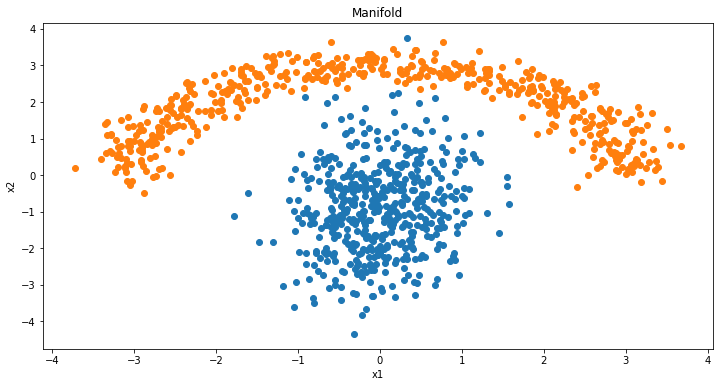

In [35]:
n_samples=500

#Generating Multivariate Normal Distribution
#mean = (0,-4)
#mean = (0,-3)
#mean = (0,-2)
mean = (0,-1)
C = np.array([[0.3, 0.1], [0.1, 1.5]])
datos1 = np.random.multivariate_normal(mean, C, n_samples)

#Generating Halfmoon Distribution
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x,outer_circ_y)).T
generator = check_random_state(10)
datos2 += generator.normal(scale=0.3, size=datos2.shape)

print "Shape Datos1: ", datos1.shape
print "Shape Datos2: ", datos2.shape

x1,y1 = datos1.T
x2,y2 = datos2.T

plt.figure(figsize=(12,6))
plt.scatter(x1,y1)
plt.scatter(x2,y2)
plt.title("Manifold")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

A continuación se agrega un parámetro de ruido para agregar más complejidad de clasificación al conjunto de datos. Según la magnitud de ruido escogida se realiza un shift de datos desde un conjunto a otro.

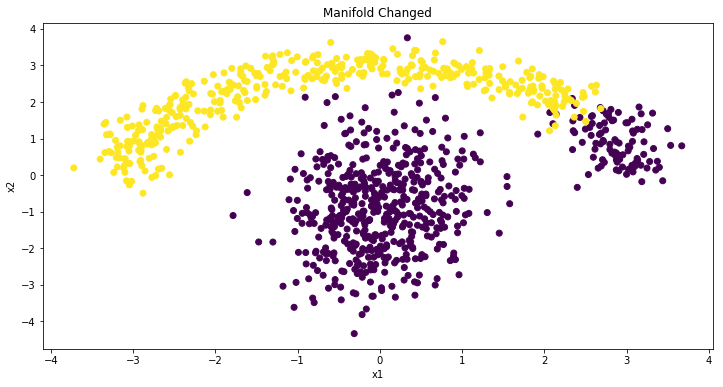

Dataset 1 Size: 600
Dataset 2 Size: 400


In [36]:
X = np.concatenate((datos1, datos2), axis=0)
#y = [i%2 for i in range(len(datos1)+len(datos2))] #No linear separable

n = 100 #Noise
y1 = np.zeros(datos1.shape[0]+n)
y2 = np.ones(datos2.shape[0]-n)
y = np.concatenate((y1,y2),axis=0)

plt.figure(figsize=(12,6))
plt.scatter(X[:,0],X[:,1], c=y)
plt.title("Manifold Changed")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

print "Dataset 1 Size:", len(y1)
print "Dataset 2 Size:", len(y2)

A continuación se presentan las fronteras de clasificación de dos modelos generativos LDA y QDA

In [ ]:
import matplotlib.pyplot as plt
from ipywidgets import interactive
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import confusion_matrix

def visualize_border(model,x,y,title=""):
    fig = plt.figure(figsize=(12,6))
    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

    
def visualize_border_interactive_noise(noise):
    y1 = np.zeros(datos1.shape[0]+noise)
    y2 = np.ones(datos2.shape[0]-noise)
    y = np.concatenate((y1,y2),axis=0)
    
    mTest_size = 0.3
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=mTest_size, random_state=0)
    
    model_lda = LDA()
    model_qda = QDA()
        
    model_lda.fit(X_train,y_train)
    model_qda.fit(X_train,y_train)
    visualize_border(model_lda,X,y,"LDA trained with %.2f"%(1-mTest_size)+" of the data")
    visualize_border(model_qda,X,y,"QDA trained with %.2f"%(1-mTest_size)+" of the data")
    y_pred_lda = model_lda.predict(X_test)
    y_pred_qda = model_qda.predict(X_test)
    print("Miss Classification Loss of LDA: %.2f"%(1-accuracy_score(y_test, y_pred_lda)))
    print("Miss Classification Loss of QDA: %.2f"%(1-accuracy_score(y_test, y_pred_qda)))
    
    print("Confusion Matrix of LDA")
    print(confusion_matrix(y_test, y_pred_lda))
    
    print("Confusion Matrix of QDA")
    print(confusion_matrix(y_test, y_pred_qda))
    
interactive(visualize_border_interactive_noise,noise=(0,500))

##### LDA
En Linear Discriminant Analysis (LDA) se construye una frontera de clasificación lineal modelando las densidades de las clases:

\begin{equation}
f_k(x) = P(G=k|X=x) = E(Y_k|X)
\end{equation}

En otras palabras, se define la densidad de clases como $f_k(x)$ correspondiente a la densidad condicional de $X$ dado $G = k$. Eesta densidad utilizando una Distribución Multivariada Gaussiana (DMG):

\begin{equation}
f_k(x) = \frac{1}{(2\pi)^{p/2}|\Sigma_k|^{1/2}}e^{-\frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k)}
\end{equation}

En particular LDA asume que las clases poseen la misma matriz de covarianza, es decir $\Sigma_k=\Sigma \quad \forall k$. Gracias a esta suposición la comparación de dos clases $k$ y $l$ resulta en una ecuación lineal en $x$ y $p$ al utilizar log-ratio:

\begin{equation}
\begin{split}
log\frac{P(G=k|X=x)}{P(G=l|X=x)}&=log\frac{f_k(x)}{f_l(x)}log\frac{\pi_k}{\pi_l}\\
&=log\frac{\pi_k}{\pi_l}-\frac{1}{2}(\mu_k+\mu_l)^T\Sigma^{-1}(\mu_k-\mu_l)\\
&\quad+x^T\Sigma^{-1}(\mu_k-\mu_l)
\end{split}
\end{equation}

Siendo las funciones discriminantes:

\begin{equation}
\delta_k(x) = x^T\Sigma^{-1}\mu_k-\frac{1}{2}\mu_k^T\Sigma^{-1}\mu_k+log\pi_k
\end{equation}

##### QDA
Para el caso de Quadratic Discriminant Analysis (QDA), el proceso para generar la frontera de clasificación es el mismo excepto que no se realiza la suposición de que las matrices de covarianza de las clases son iguales, aquí se asumen distintas y por lo tanto no se eliminan los términos cuadráticos de la ecu, quedando las funciones discriminantes:

\begin{equation}
\delta_k(x) = -\frac{1}{2}log|\Sigma_k|-\frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k)+log\pi_k
\end{equation}

##### Análisis Cuantitativo

En términos cuantitativos, y para este dataset, uno esperaria que QDA tuviese un menor error de predicción debido a que su frontera de clasificación es cuadrática, y en el dataset propuesto se aprecia claramente que la frontera de decisión no puede ser lineal para clasificar todo con exactitud. En efecto esto se puede apreciar al ir variando el hiper-parámetro \textit{noise}, mientras mayor sea el valor de \textit{noise} la frontera para clasificar se vuelve lineal, lo que se ve reflejado en el error de clasificación.

### Accuracy:

\begin{equation}
\frac{TP+TN}{TP+TN+FP+FN}
\end{equation}

Valores para el caso de $noise=0$:
<pre>
Miss Classification Loss of LDA: 0.12
Miss Classification Loss of QDA: 0.03
</pre>

### <a href="https://en.wikipedia.org/wiki/Confusion_matrix">Confusion Matrix</a>
<pre>
Confusion Matrix of LDA
[[129  15]
 [ 22 134]]
Confusion Matrix of QDA
[[136   8]
 [  0 156]]
 </pre>

##### Logistic Regression, SVM, Classification Tree & KNN

En la presente sección se analizarán los parámetros de regularización para distintos algoritmos de clasificación. 

In [39]:
mTest_size = 0.3

In [40]:
def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X,y)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=mTest_size, random_state=0)
    y_pred = model.predict(X_test)
    print("Miss Classification Loss: %.2f"%(1-accuracy_score(y_test, y_pred)))
    print("Confusion Matrix")
    print(confusion_matrix(y_test, y_pred))

In [70]:
from sklearn.linear_model import LogisticRegression as LR
def train_model(param):
    model=LR() #define your model
    model.set_params(C=param,penalty='l2')
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=mTest_size, random_state=0)
    model.fit(X_train,y_train)
    return model

p_min = 1 #define your range
p_max = 10000 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

El parametro de regularizacion en regresion logistica tiene como fin evitar que los pesos del modelo se ajuste al ruido, es decir evitar over-fitting, por lo que mientras mas ruido mas regularizacion se va a necesitar

In [69]:
from sklearn.svm import SVC as SVM
#SVC is for classification
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='linear')
    model.fit(X,y)
    return model

p_min = 1 #define your range
p_max = 10000 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

In [44]:
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='rbf')
    model.fit(X,y)
    return model

p_min = 1 #define your range
p_max = 10000 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

In [68]:
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='poly')
    model.fit(X,y)
    return model

p_min = 1 #define your range
p_max = 10000 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

No ocurren cambios visibles segun el parametro de regularizacion, sin embargo se sabe que este influye en que mientras mayor es el valor del parametro menor sera la cantidad de valores que se podran aceptar como mal clasificados, lo que quiere decir que conllevara a over-fitting.

Analizar valores del parámetro de profundidad del árbol de decisión

In [67]:
from sklearn.tree import DecisionTreeClassifier as Tree
def train_model(param):
    model = Tree()#edit the train_model function
    model.set_params(max_depth=param,criterion='gini',splitter='best')
    model.fit(X,y)
    return model

p_min = 1 #define your range
p_max = 30 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

Mientras mas profundidad tenga el arbol (aumento de paramentro de regularizacion) mayor sera el over-fitting.

Analizar valores del parámetro de k del algoritmo de clasificación K-NN

In [66]:
from sklearn.neighbors import KNeighborsClassifier
def train_model(param):
    model = KNeighborsClassifier()
    model.set_params(n_neighbors=param)
    model.fit(X,y)
    return model

p_min = 1 #define your range
p_max = 50 #define your range
interactive(visualize_border_interactive,param=(p_min,p_max))

Mientras menor es el parametro de regularizacion mayor será el over-fitting, en caso contrario la frontera de decision sera mas suave en el espacio de caracteristicas.

# Análisis de Audio - Datos Brutos

### <a href="https://www.kaggle.com/kinguistics/heartbeat-sounds">Heartbeat-sounds Kaggle</a>

A continuación se realizará un procesamiento de datos crudos para luego poder realizar tareas de clasificación con distintos algoritmos como Logistic Regression, SVM y Decision Trees. Dentro del trabajo de procesamiento de datos crudos se utiliza una herramienta de reducción de dimensionalidad llamada PCA.

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
from scipy.io import wavfile

def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name

SAMPLE_RATE = 44100
def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b

In [51]:
df = pd.read_csv('./heartbeat-sounds_dataset/set_a.csv')
df.head()

,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


In [52]:
df['label'].value_counts(dropna=False)

NaN         52
artifact    40
murmur      34
normal      31
extrahls    19
Name: label, dtype: int64

A continuación se realiza un "padd de ceros", en otras palabras se estandariza la dimensionalidad de las series de tiempo ya que en principio poseen distintos largos. Este paso es importante porque más adelante el espacio de características (X) estará conformado por estas series de tiempo, y por tanto deben poser la misma cantidad de columnas $(p+1)$, considerando el intercepto. 

In [53]:
def padd_zeros(array,length):
    aux = np.zeros(length)
    aux[:array.shape[0]] = array
    return aux

new_df =pd.DataFrame({'file_name' : df['fname'].apply(clean_filename,string='Aunlabelledtest')})
new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path='heartbeat-sounds_dataset/set_a/')
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series']=new_df['time_series'].apply(padd_zeros,length=max(new_df['len_series']))
print("DataFrame Edit Ok")

DataFrame Edit Ok


### <a href="https://www.kaggle.com/toregil/new-labels-for-set-a">New labels for set a</a>

Cambiar Labels 

In [54]:
new_labels =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
             0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
             1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
             2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
             1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0,
             2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0,
             0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

labels = ['artifact','normal/extrahls', 'murmur']
new_df['target'] = [labels[i] for i in new_labels]

Cambiar clases a valores numéricos para ser trabajados por los clasificadores

In [55]:
new_df["target"] = new_df["target"].astype('category')
cat_columns = new_df.select_dtypes(['category']).columns
new_df[cat_columns] = new_df[cat_columns].apply(lambda x: x.cat.codes)

In [56]:
new_df = new_df.sample(frac=1,random_state=44)
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.target.values
X.shape

(176, 396900)

Del bloque de código anterior se obtiene la dimensionalidad de $X$. Se puede apreciar que la cantidad de columnas es casi 400.000. Si no se realiza algún tipo de pre procesmiento el algoritmo se volvera extremádamente complejo y se verá afectado por "La Maldición de la Dimensionalidad", cayendo por tanto en \textit{overfiting}. Para solucionar este problema, se procesa la secuencia de tiempo utilizando una <a href="https://en.wikipedia.org/wiki/Fourier_transform">transformada de fourier discreta</a> para pasar los datos desde el dominio de tiempos al de frecuencias, presentes en la señal de sonido; de esta manera se reduce la dimensionalidad considerablemente.

In [57]:
from scipy import signal

X_fourier = np.abs(np.fft.fft(X))

X_resampled = []
for i in range(X_fourier.shape[0]):
    sequence = X_fourier[i,:].copy()
    resampled_sequence = signal.resample(sequence, 100000)
    X_resampled.append(resampled_sequence)

X_resampled = np.array(X_resampled)
X_resampled.shape

(176, 100000)

Del bloque de código anterior se aprecia una reducción del orden de un 75%

##### Hold-out Validation

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y, test_size=0.25, random_state=42)

#Standarization
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

print "X_train.shape: ", X_train.shape
print "y_train.shape: ", y_train.shape

In [ ]:
#PCA
from sklearn.decomposition import PCA
d=2
pca_model = PCA(n_components=d)
pca_model.fit(X_train)
X_pca_train = pca_model.transform(X_train)
X_pca_test = pca_model.transform(X_test)

print "PCA X_train.shape: ", X_pca_train.shape
plt.figure(figsize=(12,6))
plt.plot(X_pca_train[:,0], X_pca_train[:,1])
plt.show()

Construir gráfico de error de entrenamiento y testeo en función del hiper-parámetro de regularización C para un modelo de Regresión Logística y para otro de SVM con kernel lineal

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC as SVM
from sklearn.model_selection import train_test_split

Cs = [0.0001,0.01,0.1,1,10,100,1000]

e_train = []
e_test = []
for c in Cs:
    model = LR()
    model.set_params(C=c,penalty='l2')
    model.fit(X_pca_train,y_train)
    e_train.append(model.score(X_pca_train,y_train))
    e_test.append(model.score(X_pca_test,y_test))
    
print("Logistic Regression Error's Plot")
fig = plt.figure(figsize=(12,6))
plt.title("Logistic Regression Train and Test error for different C parameters ")
plt.plot(Cs,e_train, label="train error")
plt.plot(Cs,e_test, label="test error")
plt.legend(loc=2)
plt.show()

e_train = []
e_test = []
for c in Cs:    
    model = SVM()
    model.set_params(C=c,kernel='linear')
    model.fit(X_pca_train,y_train)
    e_train.append(model.score(X_pca_train,y_train))
    e_test.append(model.score(X_pca_test,y_test))
    
print("SVM Error's Plot")
fig = plt.figure(figsize=(12,6))
plt.title("SVM Train and Test error for different C parameters ")
plt.plot(Cs,e_train, label="train error")
plt.plot(Cs,e_test, label="test error")
plt.legend(loc=2)
plt.show()

from sklearn.tree import DecisionTreeClassifier as Tree

Depths = range(1,30)
e_train = []
e_test = []
for d in Depths:
    model = Tree()
    model.set_params(max_depth=d,criterion='gini',splitter='best')
    model.fit(X_pca_train,y_train)
    e_train.append(model.score(X_pca_train,y_train))
    e_test.append(model.score(X_pca_test,y_test))

print("Decision Tree Error's Plot")
fig = plt.figure(figsize=(12,6))
plt.title("Decision Tree Train and Test error for different depth parameters ")
plt.plot(Depths,e_train, label="train error")
plt.plot(Depths,e_test, label="test error")
plt.legend(loc=2)
plt.show()

Experimente con diferentes dimensiones <i>d</i> para la proyección de PCA con el propósito de obtener un modelo con menor error. Construya una tabla o grafico resumen

Realice otra reducción de dimensionalidad ahora a través de la técnica LDA, para representar los datos en <i>d</i> = 2 dimensiones. Recuerde que solo se debe ajustar con el conjunto de entrenamiento, si se muestra un warning explique el por qué. Visualice apropiadamente la proyección en 2 dimensiones.

In [ ]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_lda = LDA(n_components=2)
model_lda.fit(X_train,y_train)
X_lda_train = model_lda.transform(X_train)
X_lda_test = model_lda.transform(X_test)

print "LDA X_train.shape: ", X_lda_train.shape
plt.figure()
plt.plot(X_lda_train[:,0], X_lda_train[:,1])
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC as SVM
from sklearn.model_selection import train_test_split

Cs = [0.0001,0.01,0.1,1,10,100,1000]

e_train = []
e_test = []
for c in Cs:
    model = LR()
    model.set_params(C=c,penalty='l2')
    model.fit(X_lda_train,y_train)
    e_train.append(model.score(X_lda_train,y_train))
    e_test.append(model.score(X_lda_test,y_test))
    
print("Logistic Regression Error's Plot")
fig = plt.figure(figsize=(12,6))
plt.title("Logistic Regression Train and Test error for different C parameters ")
plt.plot(Cs,e_train, label="train error")
plt.plot(Cs,e_test, label="test error")
plt.legend(loc=2)
plt.show()

e_train = []
e_test = []
for c in Cs:    
    model = SVM()
    model.set_params(C=c,kernel='linear')
    model.fit(X_lda_train,y_train)
    e_train.append(model.score(X_lda_train,y_train))
    e_test.append(model.score(X_lda_test,y_test))
    
print("SVM Error's Plot")
fig = plt.figure(figsize=(12,6))
plt.title("SVM Train and Test error for different C parameters ")
plt.plot(Cs,e_train, label="train error")
plt.plot(Cs,e_test, label="test error")
plt.legend(loc=2)
plt.show()

from sklearn.tree import DecisionTreeClassifier as Tree

Depths = range(1,30)
e_train = []
e_test = []
for d in Depths:
    model = Tree()
    model.set_params(max_depth=d,criterion='gini',splitter='best')
    model.fit(X_lda_train,y_train)
    e_train.append(model.score(X_lda_train,y_train))
    e_test.append(model.score(X_lda_test,y_test))

print("Decision Tree Error's Plot")
fig = plt.figure(figsize=(12,6))
plt.title("Decision Tree Train and Test error for different depth parameters ")
plt.plot(Depths,e_train, label="train error")
plt.plot(Depths,e_test, label="test error")
plt.legend(loc=2)
plt.show()

Con el propósito de encontrar el mejor modelo vuelva a realizar el item h) con el i) en el nuevo espacio generado por la representación según las <i>d</i> dimensiones de la proyección LDA. Esta nueva representación ¿mejora o empeora el desempeño? Explique

##### Feature Crafting

### <a href="https://www.kaggle.com/primaryobjects/voicegender">Voice Classification</a>

# Análisis de Emociones - Twitter

<a href="https://www.crowdflower.com/data-for-everyone/">Crowd Flower</a>

Se carga el archivo como dataframe de la libreria pandas, de este archivo se extraen las clases existentes que son el objetivo que deberán predecir los modelos de clasificación que se utilizarán en esta parte de la tarea. Se tiene que el archivo consiste de 40.000 tweets que han sido catalogados como uno de entre las 13 emociones posibles: 'empty', 'sadness', 'enthusiasm', 'neutral', 'worry', 'surprise', 'love', 'fun', 'hate', 'happiness', 'boredom', 'relief', 'anger'. La etiqueta 'content' corresponde al texto de los tweets mientras que author son quienes los envian, ambos son menores a la cantidad total de tweets posiblemente a que existen tweets con el mismo texto y multiples autores responsables de mas de 1 solo tweet.

In [48]:
import pandas as pd
file_path = './text_emotion.csv'
df = pd.read_csv(file_path)
descripcion = df.apply(lambda x: len(x.unique()))
sentimientos = df.sentiment.unique()
print sentimientos
print descripcion

['empty' 'sadness' 'enthusiasm' 'neutral' 'worry' 'surprise' 'love' 'fun'
 'hate' 'happiness' 'boredom' 'relief' 'anger']
tweet_id     40000
sentiment       13
author       33871
content      39827
dtype: int64


Se implementa un pre-procesamiento para los tweets, de modo de dejarlos en un formato estándarizado para luego ser trabajados. El pre-procesamiento implementado consiste en eliminar links, convertir todo el texto a minúscula y eliminar números dado que se estima que estos no aportan información relevante, se eliminan los signos y puntuaciones. Utilizando la libreria de nltk se obtienen los stopwords del inglés y estos son eliminados ya que son repetitivos en todos los textos (palabras como 'for', 'of', 'are', 'the', etc), luego se pasa a 'Lemmatisation' que consiste en transformar todas las palabras a su forma básica utilizando un diccionario, esto convierte palabras como 'produce' y 'produced' a 'produce'.
Alfinal del pre-procesamiento se obtiene la columna 'content_pre' el cual contiene el texto pre-procesado, la columna 'sentiment_bi' que representa la polaridad de la emocion (-1 y 1), y finalmente 'sentiment_cod' el cual tiene las 13 emociones codificadas del 0 al 12.

In [51]:
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re
import HTMLParser
df["content_pre"] = ""
stop = stopwords.words('english')
puncts = ".,:;?!()[]{}~+-\"\'#$%&"
tt = TweetTokenizer(strip_handles=True)
ps = PorterStemmer()
wd = WordNetLemmatizer()
html_parser = HTMLParser.HTMLParser()
df["sentiment_bi"] = 0
negativos = ['surprise', 'empty', 'sadness', 'worry', 'hate', 'boredom', 'anger']
positivos = ['neutral', 'enthusiasm', 'love', 'fun', 'happiness', 'relief']
df["sentiment_cod"] = 0
sentimientos_cod = {key: value for (value, key) in enumerate(sentimientos)}
for row, col in df.iterrows():
    content = df.loc[row, "content"]
    
    #Eliminando links, parseando tags html, pasando a minusculas y eliminando numeros
    #content = html_parser.unescape(content)
    content = re.sub(r"http\S+", "", content)
    content = content.lower().replace('\d+', '')
    
    #Eliminando signos y puntuaciones
    for sym in puncts:
        content = content.replace(sym, ' ')
        
    #Eliminando Stopwords
    content = ' '.join([word for word in content.split() if word not in stop])
    
    #Tokenizando
    content = tt.tokenize(content)
    
    #Stemming
    #content = [ps.stem(word) for word in content]
    
    #Lemmatisation
    content = [wd.lemmatize(word) for word in content]
    
    content = ' '.join([word for word in content])
    
    #Guardar en columna "content_pre"
    df.set_value(row, "content_pre", content)
    
    sentimiento = df.loc[row, "sentiment"]
    if sentimiento in negativos:
        df.loc[row, "sentiment_bi"] = -1
    else:
        df.loc[row, "sentiment_bi"] = 1
    
    #i
    df.loc[row, "sentiment_cod"] = sentimientos_cod.get(sentimiento)
    
df["sentiment_bi"].astype(int)

C:\Users\Paralizis\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\ipykernel\__main__.py:32: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


0       -1
1       -1
2       -1
3        1
4        1
5       -1
6       -1
7       -1
8       -1
9       -1
10       1
11      -1
12      -1
13      -1
14      -1
15      -1
16       1
17      -1
18      -1
19      -1
20      -1
21       1
22       1
23      -1
24      -1
25      -1
26      -1
27      -1
28      -1
29      -1
        ..
39970    1
39971    1
39972    1
39973    1
39974    1
39975   -1
39976    1
39977   -1
39978   -1
39979   -1
39980    1
39981    1
39982    1
39983    1
39984   -1
39985    1
39986    1
39987    1
39988    1
39989    1
39990    1
39991    1
39992    1
39993    1
39994    1
39995    1
39996    1
39997    1
39998    1
39999    1
Name: sentiment_bi, dtype: int32

Las emociones negativas son: 'surprise', 'empty', 'sadness', 'worry', 'hate', 'boredom', 'anger'
Las emociones positivas son: 'neutral', 'enthusiasm', 'love', 'fun', 'happiness', 'relief'.
Notar que se decidio dejar la emocion neutral dentro de las positivas con el fin de equilibrar la cantidad de clases en el conjunto de datos.

In [52]:
print df.iloc[:30,4:-1]

                                          content_pre  sentiment_bi
0   know listenin bad habit earlier started freaki...            -1
1             layin n bed headache ughhhh waitin call            -1
2                      funeral ceremony gloomy friday            -1
3                               want hang friend soon             1
4               want trade someone houston ticket one             1
5                   pinging go prom bc bf like friend            -1
6   sleep im thinking old friend want married damn...            -1
7                                                hmmm            -1
8                                  charlene love miss            -1
9                                  sorry least friday            -1
10                                   cant fall asleep             1
11                                    choked retainer            -1
12                 ugh beat stupid song get next rude            -1
13  u watch hill london u realise tourture week 

Con el dataframe actualizado se construyen los conjuntos de entrenamiento y de pruebas

In [53]:
import numpy as np
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]

Con el dataframe pre-procesado es posible convertir el texto de los tweets en un vector de características, para ello se utiliza TfidfVectorizer el cual al igual que CountVectorizer cuenta la cantidad de repeticiones de las palabras en todos los texto (Tf: Term frequency), además asigna un 'score' a la palabra según la cantidad de veces que se repite en todos los texto, las palabras con menor repetición tendrán un 'score' aumentado ya que esto implica que son mas significativas para la clasificación, en cambio las palabras con mayor repetición tendran un 'score' reducido (idf: Inverse document frequency).<br>
Se utilizan 5 clasificadores para la clasificacion binaria de los datos, estos son: Multinomial Naive Bayes, Regresión logística, SVM, LinearSVM y Arboles de decisión.

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
# feature extraction
#TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=5, max_df=0.95, sublinear_tf = True,use_idf = True,ngram_range=(1, 2)) #TfidfVectorizer(min_df = 3)  
train_X_tfidf = vectorizer.fit_transform(df_train.content_pre)
test_X = vectorizer.transform(df_test.content_pre)
train_y = df_train.sentiment_bi
test_y = df_test.sentiment_bi

# #############################################################################
#Clasificadores
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier

#Multinomial Naive Bayes
clf_mnb = MultinomialNB().fit(train_X_tfidf, train_y)
clf_score_train = clf_mnb.score(train_X_tfidf, train_y)
clf_score_test = clf_mnb.score(test_X, test_y)
print 'Multinomial Naive Bayes score: Train: {} Test: {}'.format(clf_score_train, clf_score_test)

#Regresion logística
clf_logreg = LogisticRegression().fit(train_X_tfidf, train_y)
clf_score_train = clf_logreg.score(train_X_tfidf, train_y)
clf_score_test = clf_logreg.score(test_X, test_y)
print 'Regresion logística score: Train: {} Test: {}'.format(clf_score_train, clf_score_test)

#SVM
clf_svc = SVC().fit(train_X_tfidf, train_y)
clf_score_train = clf_svc.score(train_X_tfidf, train_y)
clf_score_test = clf_svc.score(test_X, test_y)
print 'SVC score: Train: {} Test: {}'.format(clf_score_train, clf_score_test)

#Linear SVM
clf_lsvc = LinearSVC().fit(train_X_tfidf, train_y)
clf_score_train = clf_lsvc.score(train_X_tfidf, train_y)
clf_score_test = clf_lsvc.score(test_X, test_y)
print 'Linear SVC score: Train: {} Test: {}'.format(clf_score_train, clf_score_test)

#Arboles de decisión
clf_ad = DecisionTreeClassifier().fit(train_X_tfidf, train_y)
clf_score_train = clf_ad.score(train_X_tfidf, train_y)
clf_score_test = clf_ad.score(test_X, test_y)
print 'Arboles de decisión score: Train: {} Test: {}'.format(clf_score_train, clf_score_test)

Multinomial Naive Bayes score: Train: 0.761609907121 Test: 0.694254019693
Regresion logística score: Train: 0.77108546768 Test: 0.701483235697
SVC score: Train: 0.544610188573 Test: 0.540321575471
Linear SVC score: Train: 0.79529036495 Test: 0.680543437617
Arboles de decisión score: Train: 0.983050317416 Test: 0.627072167518


In [55]:
from sklearn.metrics import accuracy_score
def data_size_response(model,trX,teX,trY,teY,n_subsets=20):
    train_errs,test_errs = [],[]
    subset_sizes = np.exp(np.linspace(3,np.log(trX.shape[0]),n_subsets)).astype(int)
    for m in subset_sizes:
        model.fit(trX[:m],trY[:m])
        train_err = model.score(trX[:m], trY[:m])
        test_err = model.score(teX, teY)
        #print "training error: %.3f test error: %.3f subset size: %.3f" % (train_err,test_err,m)
        train_errs.append(train_err)
        test_errs.append(test_err)
    return subset_sizes,train_errs,test_errs

def plot_response(subset_sizes,train_errs,test_errs):
    plt.plot(subset_sizes,train_errs,lw=2)
    plt.plot(subset_sizes,test_errs,lw=2)
    plt.legend(['Score de entrenamiento','Score de test'])
    plt.xscale('log')
    plt.xlabel('Tamanio dataset')
    plt.ylabel('Score')
    plt.title('Score de entrenamiento vs Score de test')
    plt.show()


In [58]:
#ref http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Clasificador: Multinomial Naive Bayes


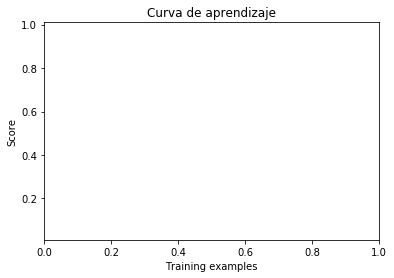

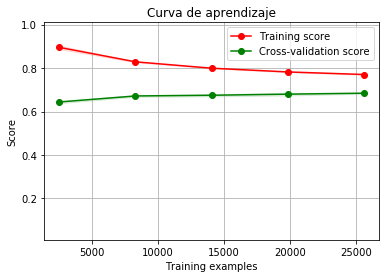

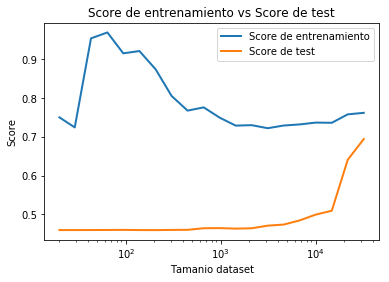

---------------------------------------------------
Clasificador: Logistic Regression


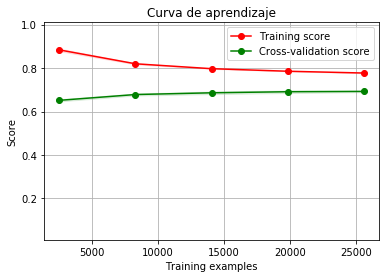

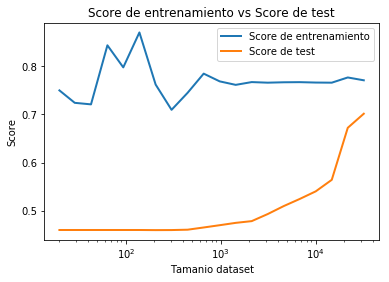

---------------------------------------------------
Clasificador: SVM


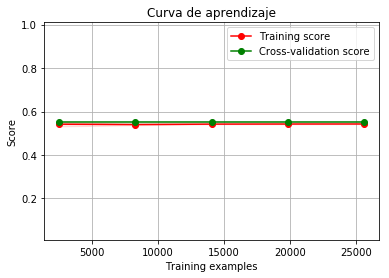

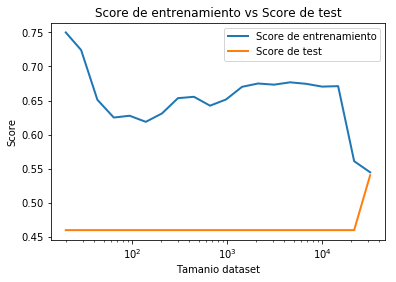

---------------------------------------------------
Clasificador: Linear SVM


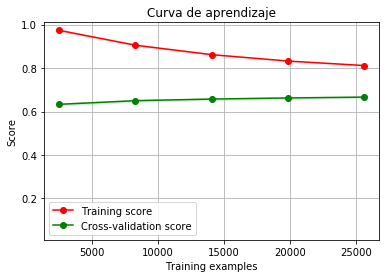

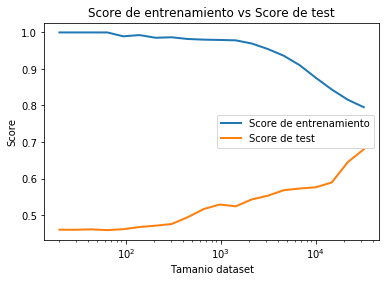

---------------------------------------------------
Clasificador: Arbol de decision


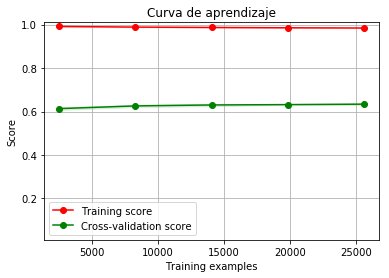

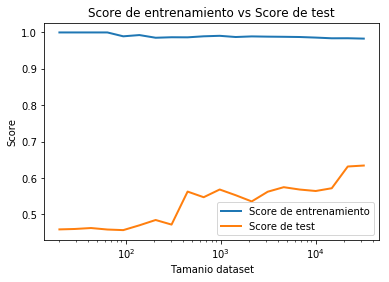

---------------------------------------------------


In [62]:
from sklearn.model_selection import ShuffleSplit
# Igual que en c) y e) 
vectorizer = TfidfVectorizer(min_df=5, max_df=0.95, sublinear_tf = True,use_idf = True,ngram_range=(1, 2)) #TfidfVectorizer(min_df = 3)  
train_X = vectorizer.fit_transform(df_train.content_pre)
test_X = vectorizer.transform(df_test.content_pre)
train_y = df_train.sentiment_bi
test_y = df_test.sentiment_bi

import matplotlib.pyplot as plt
clf_list = [(MultinomialNB(),"Multinomial Naive Bayes"),
            (LogisticRegression(), "Logistic Regression"),
            (SVC(),"SVM"), 
            (LinearSVC(),"Linear SVM"), 
            (DecisionTreeClassifier(),"Arbol de decision")]

title = "Curva de aprendizaje"
for clf, clf_name in clf_list:
    print "Clasificador: {}".format(clf_name)
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    plot_learning_curve(clf, title, train_X, train_y, ylim=(0.01, 1.01), cv=cv, n_jobs=4)
    plt.show()
    response = data_size_response(clf,train_X,test_X,train_y,test_y)
    plot_response(*response)
    print "---------------------------------------------------"


De la curva de aprendizaje se tiene que si estas no convergen a 'training score' signigica que hay over-fitting (Arboles de decision), mientras que si convergen a un valor bajo significa que se utilizo un modelo con alto bias (SVM), el resto de los modelos tiene un 'accuracy' de entre 0.69 y 0.71.

In [130]:
from sklearn.metrics import classification_report
def score_the_model(model,x,y,xt,yt):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    print "Training Accuracy: %f"%(acc_tr)
    print "Test Accuracy: %f"%(acc_test)
    print "Detailed Analysis Testing Results ..."
    print(classification_report(yt, model.predict(xt), target_names=["+1","-1"]))
clf_list_fitted = [(clf_mnb,"Multinomial Naive Bayes"), 
                   (clf_logreg, "Logistic Regression"),
                   (clf_svc,"SVM"),
                   (clf_lsvc,"Linear SVM"),
                   (clf_ad,"Arbol de decision")]
for clf, clf_name in clf_list_fitted:
    print "Clasificador: {}".format(clf_name)
    score_the_model(clf, train_X_tfidf, df_train.sentiment_bi, test_X, df_test.sentiment_bi)
    print "---------------------------------------------------"

Clasificador: Multinomial Naive Bayes
Training Accuracy: 0.759714
Test Accuracy: 0.688187
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

         +1       0.68      0.60      0.64      3666
         -1       0.69      0.76      0.73      4343

avg / total       0.69      0.69      0.69      8009

---------------------------------------------------
Clasificador: Logistic Regression
Training Accuracy: 0.768435
Test Accuracy: 0.698052
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

         +1       0.69      0.61      0.65      3666
         -1       0.70      0.77      0.73      4343

avg / total       0.70      0.70      0.70      8009

---------------------------------------------------
Clasificador: SVM
Training Accuracy: 0.544122
Test Accuracy: 0.542208
Detailed Analysis Testing Results ...
             precision    recall  f1-score   support

         +1       0.00      0.00      0.00      3666

"Classification report" entrega los valores de precision, recall y f1-score. Recall es el ritmo verdaderos positivos, es decir, la fraccion de valores positivos obtenidos de forma correcta de entre todos los valores verdaderos positivos (tp/(tp+fn)), precision es la fraccion de verdaderos positivos de entre todos los valores positivos predichos (tp/(tp+fp)), f1-score es un promedio harmónico de precision y recall, es una medida de exactitud.

In [131]:
from sklearn import metrics
for clf, clf_name in clf_list_fitted:
    print "Clasificador: {}".format(clf_name)
    print(metrics.confusion_matrix(df_test.sentiment_bi, clf.predict(test_X)))
    print "---------------------------------------------------"
# tn fp
# fn tp
# fp error tipo 1
# fn error tipo 2

Clasificador: Multinomial Naive Bayes
[[2207 1459]
 [1038 3305]]
---------------------------------------------------
Clasificador: Logistic Regression
[[2238 1428]
 [ 990 3353]]
---------------------------------------------------
Clasificador: SVM
[[   0 3666]
 [   0 4343]]
---------------------------------------------------
Clasificador: Linear SVM
[[2218 1448]
 [1114 3229]]
---------------------------------------------------
Clasificador: Arbol de decision
[[2188 1478]
 [1408 2935]]
---------------------------------------------------


In [132]:
def clf_multi(model, x_train, y_train, x_test, y_test):
    #vec_clf = Pipeline([('vectorizer', vec), ('pac', model)])
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print "Training Accuracy: %f"%(model.score(x_train, y_train))
    print "Test Accuracy: %f"%(model.score(x_test, y_test))
    print sklearn.metrics.classification_report(y_test, y_pred)

Se repite el proceso de entrenamiento pero para clasificacion multiclase, con algunos modelos distintos. Las clases del dataframe corresponde a las 13 emociones enumeradas del 0 al 12.

In [65]:
import operator
sentimientos_cod_sorted = sorted(sentimientos_cod.items(), key=lambda x: x[1])
print sentimientos_cod_sorted

[('empty', 0), ('sadness', 1), ('enthusiasm', 2), ('neutral', 3), ('worry', 4), ('surprise', 5), ('love', 6), ('fun', 7), ('hate', 8), ('happiness', 9), ('boredom', 10), ('relief', 11), ('anger', 12)]


In [133]:
import sklearn.metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import RidgeClassifier

clf_list = [(MultinomialNB(), "Multinomial Naive Bayes"),
            (BernoulliNB(alpha=.01), "Bernoull Naive Bayes"),
            (NearestCentroid(), "NearestCentroid"),
            (RidgeClassifier(tol=1e-2, solver="sag"), "Ridge Classifier"),
            (DecisionTreeClassifier(), "Arbol de decision")]
for clf, clf_name in clf_list:
    print "Clasificador: {}".format(clf_name)
    clf_multi(clf, train_X, train_y, test_X, test_y)
    print "---------------------------------------------------"

Clasificador: Multinomial Naive Bayes
Training Accuracy: 0.433716
Test Accuracy: 0.324135
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       176
          1       0.34      0.12      0.18       996
          2       0.00      0.00      0.00       159
          3       0.30      0.60      0.40      1696
          4       0.31      0.56      0.40      1710
          5       0.00      0.00      0.00       439
          6       0.56      0.28      0.38       800
          7       0.00      0.00      0.00       360
          8       0.00      0.00      0.00       283
          9       0.36      0.25      0.30      1022
         10       0.00      0.00      0.00        36
         11       0.00      0.00      0.00       306
         12       0.00      0.00      0.00        26

avg / total       0.27      0.32      0.27      8009

---------------------------------------------------
Clasificador: Bernoull Naive Bayes
Training Accuracy: 0.5665

Clasificador: Multinomial Naive Bayes


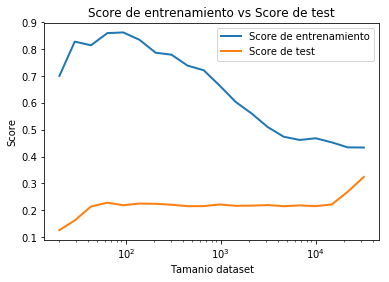

Clasificador: Bernoull Naive Bayes


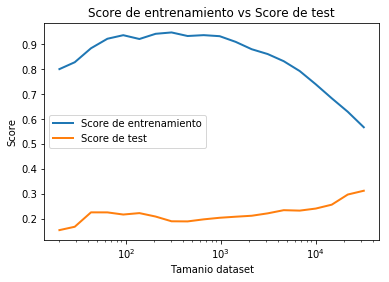

Clasificador: NearestCentroid


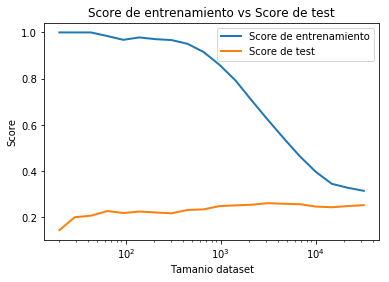

Clasificador: Ridge Classifier


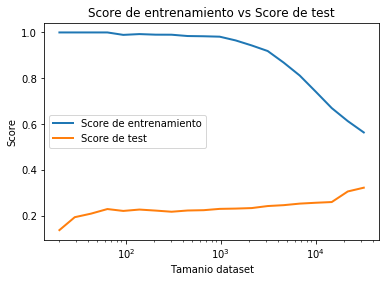

Clasificador: Arbol de decision


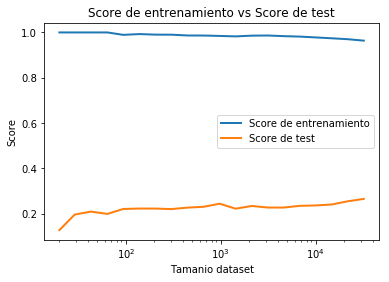

In [134]:
for clf, clf_name in clf_list:
    print "Clasificador: {}".format(clf_name)
    response = data_size_response(clf,train_X,test_X,train_y,test_y)
    plot_response(*response)

Se obtienen 'scores' mucho menores al caso de clasificacion binaria, sin embargo es esperable dado que se trata de 13 clases. De los gráficos se observa que muchos de los modelos presentan over-fitting, esto se podria solucionar al obtener mas muestras de entrenamiento o incrementando los parametros de regularizacion de los modelos. <br>
Cabe notar que el clasificador Multinomial Naive Bayes ignora por completo las clases con menor cantidad de textos asociados, y predice solamente las 5 clases con mayor ocurrencia.

In [135]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import SGDClassifier
clf_list = [(SGDClassifier(),"SGDClassifier"),
            (LogisticRegression(), "Logistic Regression"), 
            (LinearSVC(),"Linear SVM")]
for clf, clf_name in clf_list:
    clf_oo = OneVsOneClassifier(clf).fit(train_X, train_y)
    clf_score_train = clf_oo.score(train_X, train_y)
    clf_score_test = clf_oo.score(test_X, test_y)
    print '{} score: Train: {} Test: {}'.format(clf_name, clf_score_train, clf_score_test)

SGDClassifier score: Train: 0.504298083836 Test: 0.349356973405
Logistic Regression score: Train: 0.454315276171 Test: 0.349356973405
Linear SVM score: Train: 0.652714826045 Test: 0.325009364465


In [136]:
from sklearn.multiclass import OneVsRestClassifier
for clf, clf_name in clf_list:
    clf_or = OneVsRestClassifier(clf).fit(train_X, train_y)
    clf_score_train = clf_or.score(train_X, train_y)
    clf_score_test = clf_or.score(test_X, test_y)
    print '{} score: Train: {} Test: {}'.format(clf_name, clf_score_train, clf_score_test)

SGDClassifier score: Train: 0.549435778813 Test: 0.302409788987
Logistic Regression score: Train: 0.474539714295 Test: 0.354725933325
Linear SVM score: Train: 0.627051358194 Test: 0.311399675365


In [137]:
lr_list = ((OneVsRestClassifier(LogisticRegression(multi_class="ovr")), "LR extendida OvsR"),
           (LogisticRegression(multi_class="multinomial", solver="newton-cg"), "LR extendida multinomial"))
for lr, lr_name in lr_list:
    clf = lr.fit(train_X, train_y)
    clf_score_train = clf.score(train_X, train_y)
    clf_score_test = clf.score(test_X, test_y)
    print '{} score: Train: {} Test: {}'.format(lr_name, clf_score_train, clf_score_test)

LR extendida OvsR score: Train: 0.474539714295 Test: 0.354725933325
LR extendida multinomial score: Train: 0.490356662811 Test: 0.351854164065


Se tiene que clasificadores extendidos por OneVsOne o OneVsRest no presentan grandes diferencias respecto a los resultados obtenidos al ser comparados con clasificadores multiclase, otra forma de decirlo es que los métodos para extender clasificadores binarios producen resultados similares a los clasificadores multiclase.

In [138]:
clf_list_multi = [(MultinomialNB(), "Multinomial Naive Bayes"),
                  (BernoulliNB(alpha=.01), "Bernoull Naive Bayes"),
                  (NearestCentroid(), "NearestCentroid"),
                  (RidgeClassifier(tol=1e-2, solver="sag"), "Ridge Classifier"),
                  (DecisionTreeClassifier(), "Arbol de decision")]

clf_list_ext = [(SGDClassifier(),"SGDClassifier"),
                (LogisticRegression(), "Logistic Regression"),
                (LinearSVC(),"Linear SVM")]

print "Multiclase: "
for clf, clf_name in clf_list_multi:
    clf = clf.fit(train_X, train_y)
    clf_score_train = clf.score(train_X, train_y)
    clf_score_test = clf.score(test_X, test_y)
    print '{} score: Train: {} Test: {}'.format(clf_name, clf_score_train, clf_score_test)
    
print "---------------------------------------------------" 

print "Extendidos por One vs One: "
for clf, clf_name in clf_list_ext:
    clf_oo = OneVsOneClassifier(clf).fit(train_X, train_y)
    clf_score_train = clf_oo.score(train_X, train_y)
    clf_score_test = clf_oo.score(test_X, test_y)
    print '{} score: Train: {} Test: {}'.format(clf_name, clf_score_train, clf_score_test)

Multiclase: 
Multinomial Naive Bayes score: Train: 0.43371573255 Test: 0.324135347734
Bernoull Naive Bayes score: Train: 0.566534337783 Test: 0.311774253964
NearestCentroid score: Train: 0.314994842299 Test: 0.253090273442
Ridge Classifier score: Train: 0.563002094339 Test: 0.322262454738
Arbol de decision score: Train: 0.963771060611 Test: 0.265326507679
---------------------------------------------------
Extendidos por One vs One: 
SGDClassifier score: Train: 0.504673189335 Test: 0.350230990136
Logistic Regression score: Train: 0.454315276171 Test: 0.349356973405
Linear SVM score: Train: 0.652714826045 Test: 0.325009364465


Los clasificadores binarios extendidos por otros métodos (OneVsOne) obtienen mejores resultados que aquellos extendidos por defecto